# Production (2021-07-22)

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from radar.data import load
from radar.processing import signal_intensity
from scipy.signal import detrend

import matplotlib
matplotlib.rc('font', size=16)

In [2]:
def normalized_radar_cross_section(power, range, area, calibration_constant):
    return calibration_constant * power * range**4 / area

## Calibration parameters

In [3]:
C_H, C_V = 2.5245361120845994e-06, 4.010945224807307e-06 # see calibration.ipynb for details

In [4]:
Phi_H, Phi_V = np.deg2rad(4.8), np.deg2rad(4.5)

In [5]:
theta_i = np.deg2rad(18.4)
h = 1.52 - 0.8
d = h / np.sin(theta_i)
d # m

2.2810144043641105

In [6]:
A = np.pi / 4 * Phi_H * Phi_V * d**2 / np.cos(theta_i)
A

0.028336418361637302

In [7]:
path = 'data/production/20210722'
filenames = glob.glob(path + '/radar_*.h5')
filenames.sort()
filenames

['data/production/20210722/radar_15Hz_20210722-185102.h5',
 'data/production/20210722/radar_20Hz_20210722-190447.h5',
 'data/production/20210722/radar_25Hz_20210722-191919.h5',
 'data/production/20210722/radar_30Hz_20210722-193355.h5',
 'data/production/20210722/radar_35Hz_20210722-194627.h5']

In [8]:
time, ref, Hpol, Vpol = load(filenames[0])

In [9]:
num_samples, num_records = ref.shape

In [10]:
dt = np.diff(time).mean()
time = np.linspace(time[0], time[-1] + dt, num_samples * num_records, endpoint=True)

In [11]:
rho_h = signal_intensity(Hpol.real, Hpol.imag).flatten()
rho_v = signal_intensity(Vpol.real, Vpol.imag).flatten()
rho_ref = signal_intensity(ref.real, ref.imag).flatten()

rho_h_norm = rho_h / rho_ref
rho_v_norm = rho_v / rho_ref

Text(0, 0.5, 'Hpol power')

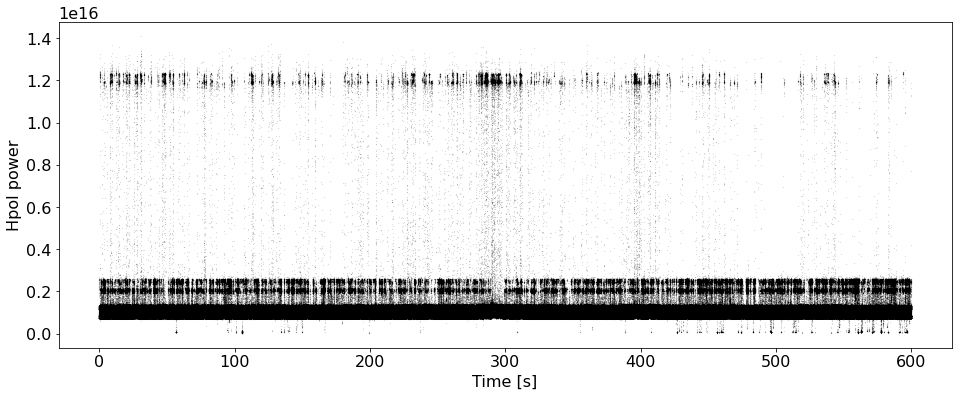

In [12]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_h, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Hpol power')

(200.0, 205.0)

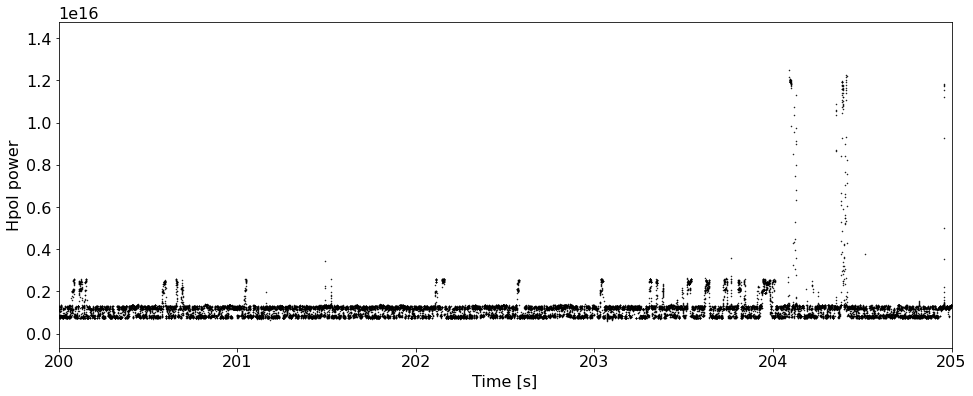

In [13]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_h, 'k.', ms=1)
plt.xlabel('Time [s]')
plt.ylabel('Hpol power')
plt.xlim(200, 205)

Text(0, 0.5, 'Vpol power')

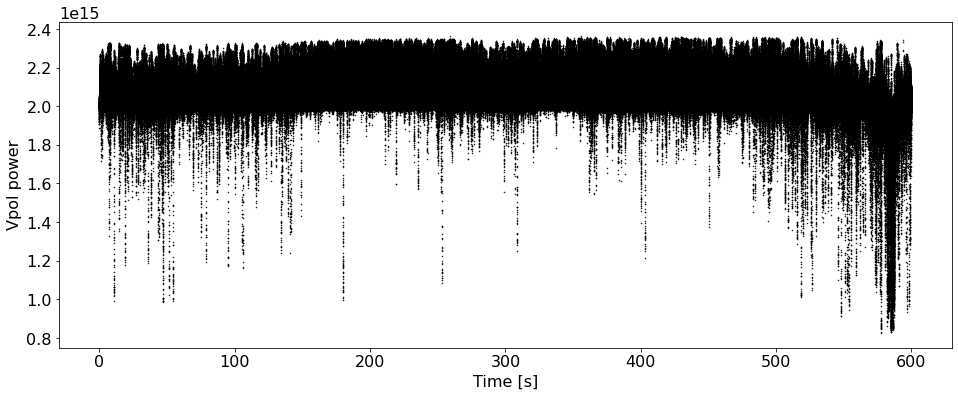

In [14]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_v, 'k.', ms=1)
plt.xlabel('Time [s]')
plt.ylabel('Vpol power')

(200.0, 205.0)

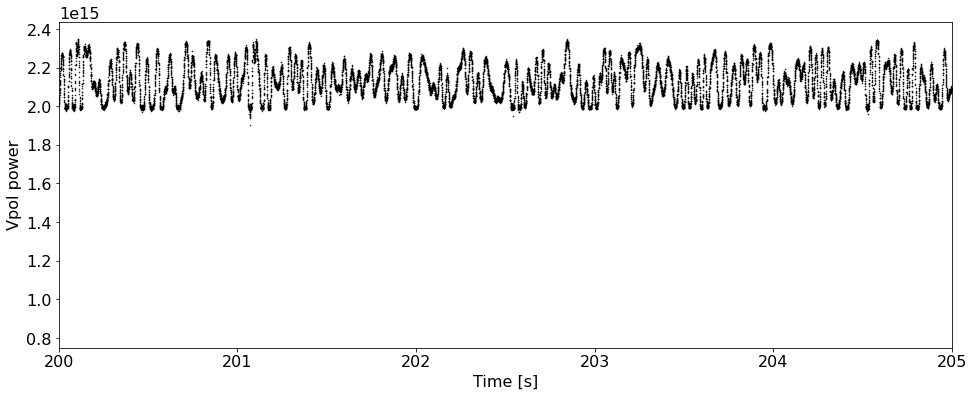

In [15]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_v, 'k.', ms=1)
plt.xlabel('Time [s]')
plt.ylabel('Vpol power')
plt.xlim(200, 205)

Text(0, 0.5, 'Reference power')

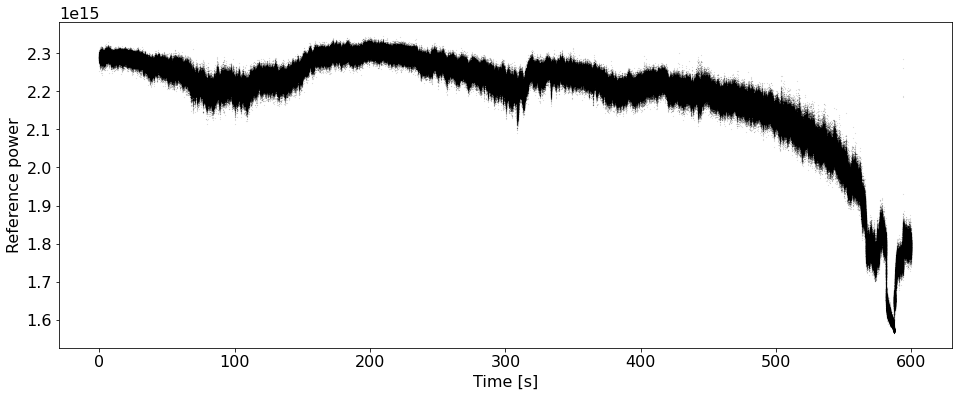

In [16]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_ref, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Reference power')

(200.0, 205.0)

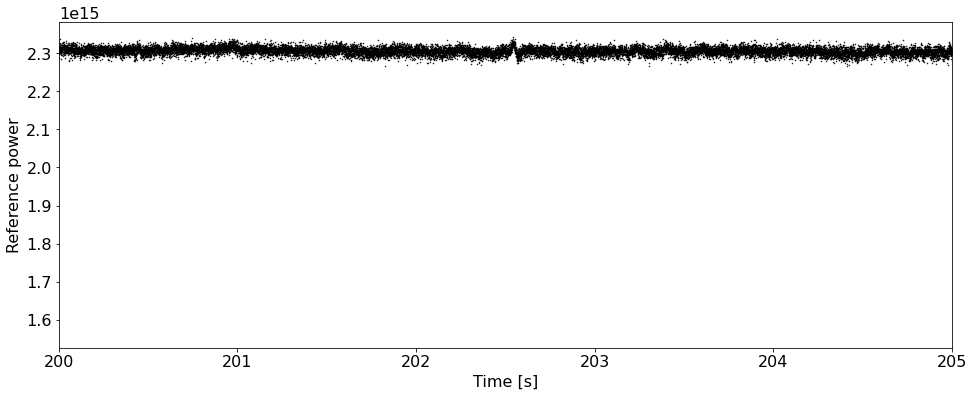

In [17]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_ref, 'k.', ms=1)
plt.xlabel('Time [s]')
plt.ylabel('Reference power')
plt.xlim(200, 205)

Text(0, 0.5, 'Hpol power')

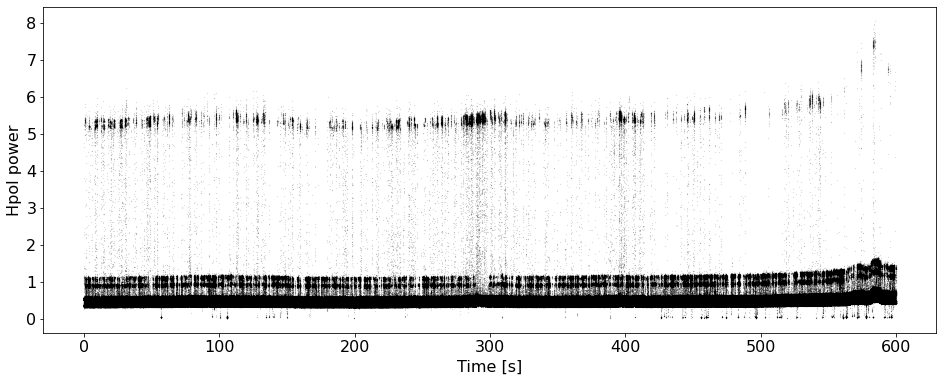

In [18]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_h / rho_ref, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Hpol power')

Text(0, 0.5, 'Vpol power')

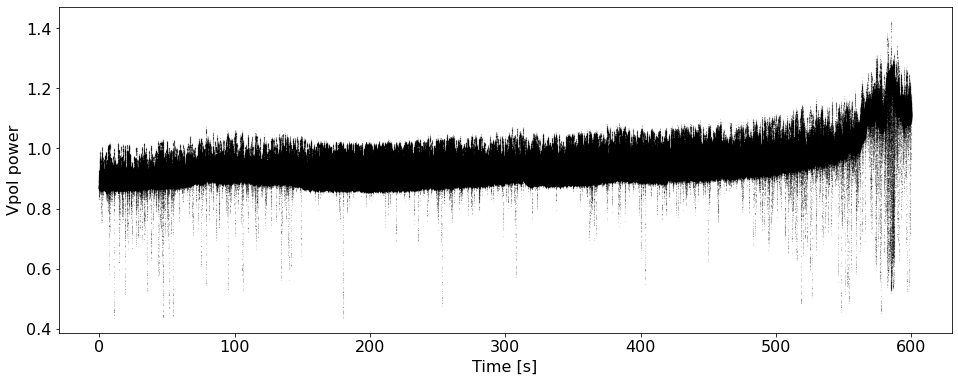

In [19]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, rho_v / rho_ref, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Vpol power')

## Normalized radar cross section

In [20]:
sigma_HH = normalized_radar_cross_section(rho_h / rho_ref, d, A, C_H)
sigma_VV = normalized_radar_cross_section(rho_v / rho_ref, d, A, C_V)

Text(0, 0.5, '$\\sigma_0^{HH}$')

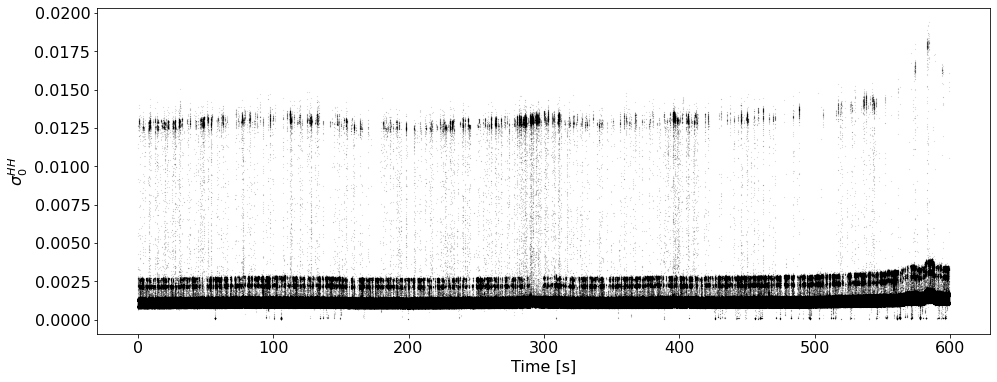

In [21]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, sigma_HH, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel(r'$\sigma_0^{HH}$')

Text(0, 0.5, '$\\sigma_0^{VV}$')

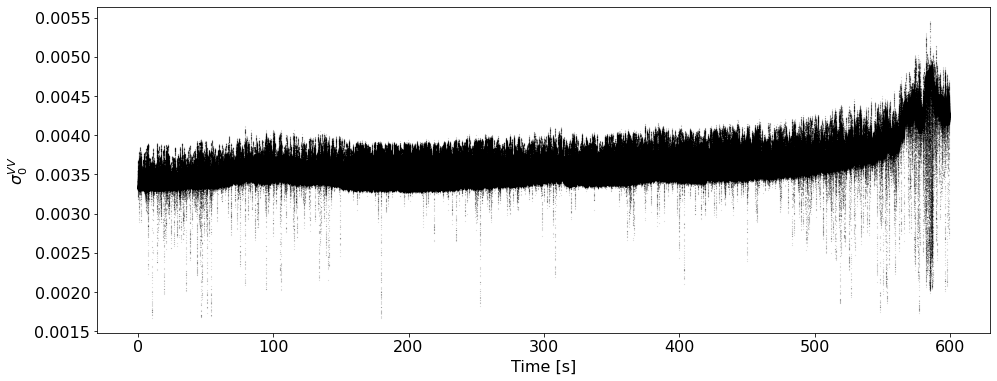

In [22]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, sigma_VV, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel(r'$\sigma_0^{VV}$')

(200.0, 205.0)

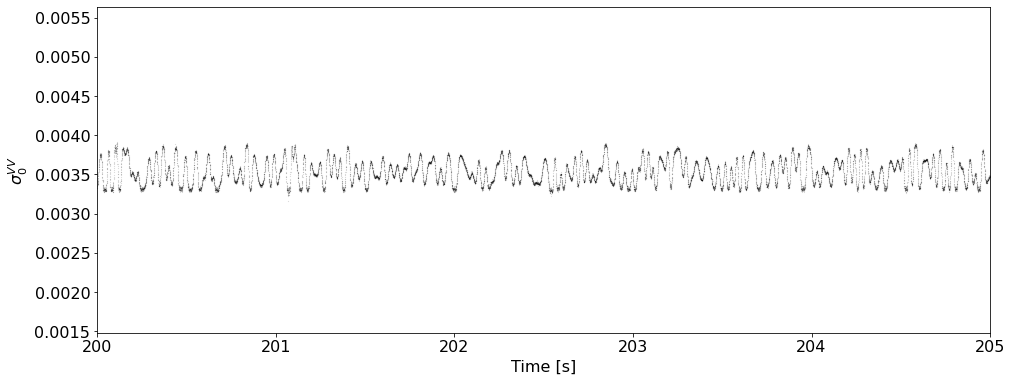

In [23]:
fig = plt.figure(figsize=(16, 6))
plt.plot(time, sigma_VV, 'k.', ms=0.1)
plt.xlabel('Time [s]')
plt.ylabel(r'$\sigma_0^{VV}$')
plt.xlim(200, 205)